In [18]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from collections import Counter 
stopwords = set(STOPWORDS)
####
import nltk
from nltk.corpus import stopwords

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giova\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df = pd.read_csv('covidbr_labeled.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   shares          2899 non-null   int64  
 1   text            2898 non-null   object 
 2   misinformation  2899 non-null   int64  
 3   source          66 non-null     object 
 4   revision        581 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 113.4+ KB


In [5]:
treino = pd.read_csv('covidbr_labeled_train.csv')
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           2028 non-null   int64  
 1   shares          2028 non-null   int64  
 2   text            2028 non-null   object 
 3   misinformation  2028 non-null   int64  
 4   source          11 non-null     object 
 5   revision        338 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 95.2+ KB


In [37]:
validacao = pd.read_csv('covidbr_labeled_val.csv')
#validacao.info()
validacao.head()

,Index,shares,text,misinformation,source,revision
0,1,1,foi covid19!,0,NaN,NaN
1,2,1,Segundo a rede esgoto vítima de covid 19,0,NaN,NaN
2,3,1,A Polícia Militar do Ceará informa que o Tenen...,0,NaN,NaN
3,4,1,"O presidente Jair Bolsonaro confirmou, nesta t...",0,NaN,NaN
4,5,1,Eu vou a China e já volto,0,NaN,NaN


In [7]:
inteiro = pd.concat([treino, validacao])
inteiro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2898 entries, 0 to 869
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           2898 non-null   int64  
 1   shares          2898 non-null   int64  
 2   text            2898 non-null   object 
 3   misinformation  2898 non-null   int64  
 4   source          66 non-null     object 
 5   revision        338 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 158.5+ KB


In [8]:
print(treino['misinformation'].value_counts())
print(validacao['misinformation'].value_counts())
print(treino['misinformation'].value_counts())
print(inteiro['misinformation'].value_counts())

0    1378
1     650
Name: misinformation, dtype: int64
0    608
1    262
Name: misinformation, dtype: int64
0    1378
1     650
Name: misinformation, dtype: int64
0    1986
1     912
Name: misinformation, dtype: int64


In [9]:
combinado = inteiro['text']
fake = inteiro[inteiro['misinformation']==1]['text']
real = inteiro[inteiro['misinformation']==0]['text']

In [10]:
print(sum(len(x) for x in combinado) / len(combinado))
print(sum(len(x) for x in fake) / len(fake))
print(sum(len(x) for x in real) / len(real))

744.675983436853
1061.0339912280701
599.3997985901309


In [11]:
print(sum(len(x.split()) for x in combinado) / len(combinado))
print(sum(len(x.split()) for x in fake) / len(fake))
print(sum(len(x.split()) for x in real) / len(real))

108.66218081435473
171.16776315789474
79.95871097683786


In [34]:
def concatena_todas_sentencas(sents):
    all_tokens = ''
    for text in sents:
        tx = str(text).lower().strip()
        tx = tx.replace('\n',' ')
        tx = tx.replace('&amp',' ')
        tx = tx.replace('#','')
        tx = tx.replace('-','')
        tx = tx.replace(';','')
        tx = " ".join(tx.split())
        all_tokens += tx + " "
    return all_tokens

In [35]:
all_tokens = concatena_todas_sentencas(combinado)
fake_tokens = concatena_todas_sentencas(fake)   
real_tokens = concatena_todas_sentencas(real)

In [28]:
stop_por = set(stopwords.words("portuguese"))
palavras_parada = list(stop_por)

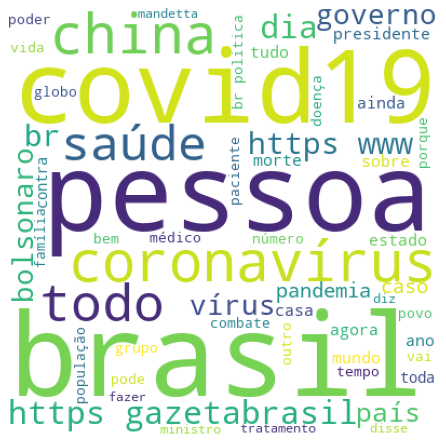

In [27]:
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = palavras_parada, 
            min_font_size = 10).generate(all_tokens) 
                      
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

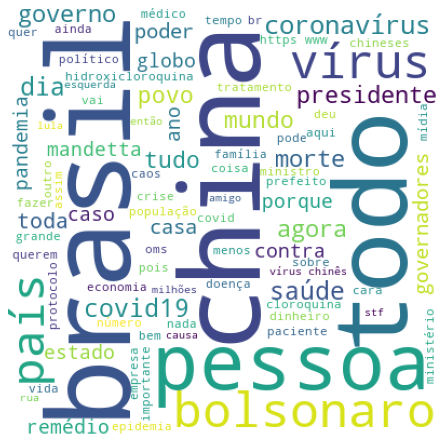

In [29]:
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = palavras_parada, 
            min_font_size = 10).generate(fake_tokens) 
                   
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

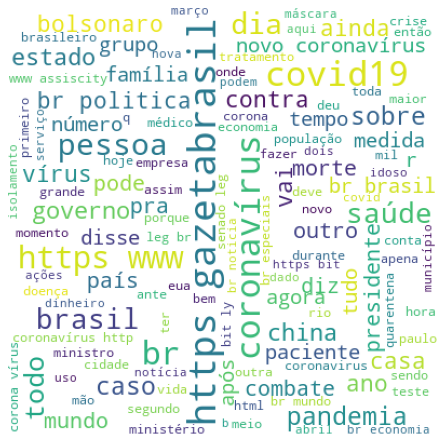

In [30]:
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = palavras_parada, 
            min_font_size = 10).generate(real_tokens) 

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [31]:
print(len(set(all_tokens.split())))
print(len(set(fake_tokens.split())))
print(len(set(real_tokens.split())))
print(len(set(fake_tokens.split()).intersection(set(real_tokens.split()))))

41201
19830
29650
8279


In [38]:
stoplist = set(stopwords.words("portuguese"))
all_tokens_words = [w for w in all_tokens.split() if w not in stoplist]
fake_tokens_words = [w for w in fake_tokens.split() if w not in stoplist]
real_tokens_words = [w for w in real_tokens.split() if w not in stoplist]

In [39]:
Counter(all_tokens_words).most_common(20)

[('pessoas', 640),
 ('brasil', 630),
 ('vai', 611),
 ('coronavírus', 568),
 ('pra', 527),
 ('sobre', 523),
 ('china', 523),
 ('governo', 510),
 ('vírus', 509),
 ('bolsonaro', 494),
 ('todos', 482),
 ('saúde', 460),
 ('presidente', 457),
 ('contra', 452),
 ('covid19', 433),
 ('...', 426),
 ('r$', 415),
 ('dia', 395),
 ('tudo', 376),
 ('ainda', 331)]

In [40]:
Counter(fake_tokens_words).most_common(20)

[('...', 412),
 ('brasil', 394),
 ('pra', 371),
 ('china', 368),
 ('vai', 351),
 ('bolsonaro', 343),
 ('vírus', 337),
 ('todos', 308),
 ('presidente', 303),
 ('pessoas', 298),
 ('tudo', 275),
 ('governo', 266),
 ('....', 263),
 ('povo', 258),
 ('porque', 235),
 ('saúde', 198),
 ('agora', 197),
 ('todo', 197),
 ('país', 193),
 ('sobre', 190)]

In [41]:
Counter(real_tokens_words).most_common(20)

[('coronavírus', 441),
 ('pessoas', 342),
 ('sobre', 333),
 ('covid19', 320),
 ('contra', 291),
 ('r$', 288),
 ('saúde', 262),
 ('vai', 260),
 ('governo', 244),
 ('brasil', 236),
 ('casos', 231),
 ('1', 221),
 ('dia', 219),
 ('pandemia', 204),
 ('pode', 185),
 ('novo', 184),
 ('ainda', 184),
 ('mil', 181),
 ('corona', 180),
 ('todos', 174)]